# Visualizing Buildings in a location along with its Area

### Import the required libraries

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly.express as px
import keplergl
import warnings
warnings.filterwarnings(action='ignore')

### Plot the map for Pune

Text(0.5, 1.0, 'Pune')

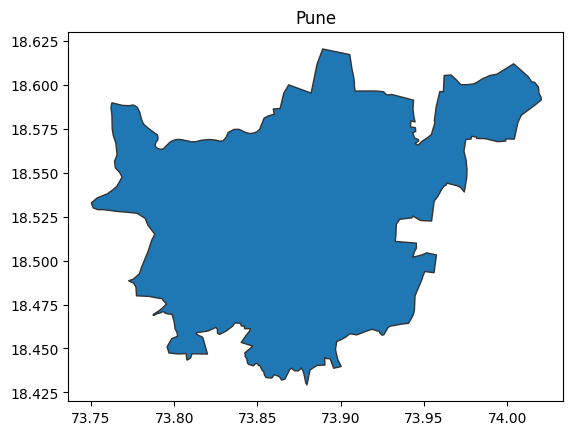

In [3]:
pune = ox.geocode_to_gdf("Pune, India")
pune.plot(edgecolor="0.2")
plt.title("Pune")

### Plot your location on the Map

In [4]:
my_location = pd.DataFrame(
    {"location":["Baner"],
    "Longitude":[73.7747862],
    "Latitude":[18.578686]}
)

In [5]:
my_location

,location,Longitude,Latitude
0,Baner,73.774786,18.578686


In [6]:
my_location = gpd.GeoDataFrame(my_location,
                    crs = "EPSG:4326",
                    geometry=gpd.points_from_xy(my_location["Longitude"],my_location["Latitude"]))

In [7]:
my_location

,location,Longitude,Latitude,geometry
0,Baner,73.774786,18.578686,POINT (73.77479 18.57869)


Text(0.5, 1.0, 'My Location in Pune')

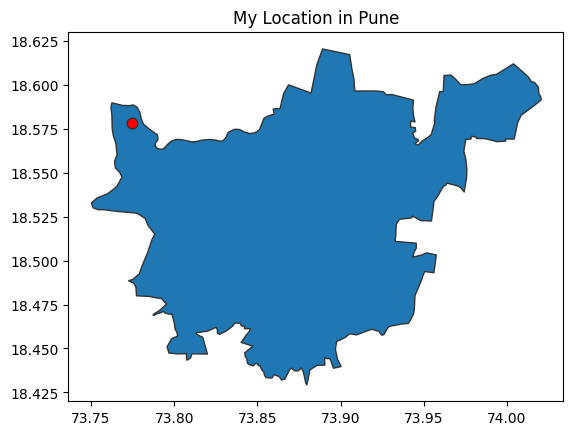

In [8]:
ax = pune.plot(edgecolor="0.2")
my_location.plot(ax=ax,markersize=60,edgecolor="0.2",color='red')
plt.title("My Location in Pune")


### Get the Bike Routes for your location

In [9]:
bike_network = ox.graph_from_point(center_point=(18.5584546,73.7852182),dist=400,network_type='bike')
bike_network

In [10]:
bike_network = (ox.graph_to_gdfs(bike_network, nodes=False)
                  .reset_index(drop=True)
                  .loc[:, ["name", "length", "geometry"]]
               )
bike_network

,name,length,geometry
0,Gopal Hari Deshmukh Marg,52.331,"LINESTRING (73.78688 18.56143, 73.78638 18.56145)"
1,NaN,127.050,"LINESTRING (73.78688 18.56143, 73.78683 18.560..."
2,Pancard Clubs Road,8.998,"LINESTRING (73.78638 18.56153, 73.78638 18.56145)"
3,Gopal Hari Deshmukh Marg,58.852,"LINESTRING (73.78638 18.56153, 73.78689 18.561..."
4,Pancard Clubs Road,8.998,"LINESTRING (73.78638 18.56145, 73.78638 18.56153)"
...,...,...,...
201,NaN,32.554,"LINESTRING (73.78206 18.55943, 73.78175 18.55946)"
202,NaN,47.738,"LINESTRING (73.78206 18.55943, 73.78204 18.55986)"
203,NaN,19.034,"LINESTRING (73.78206 18.55943, 73.78224 18.55944)"
204,NaN,32.554,"LINESTRING (73.78175 18.55946, 73.78206 18.55943)"


<AxesSubplot: >

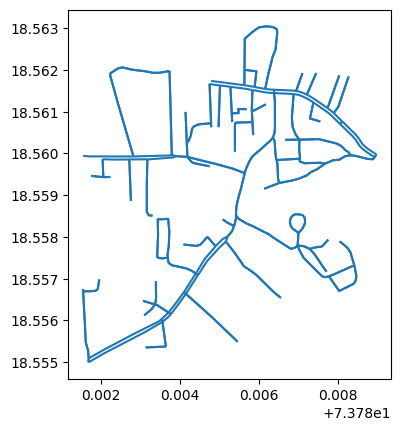

In [11]:
bike_network.plot()

In [12]:
total_length = bike_network["length"].sum()
print(f"Total bike lane length: {total_length / 1000:.0f}km")

Total bike lane length: 16km


### Plot Bike routes on the Map

Text(0.5, 1.0, 'Baner')

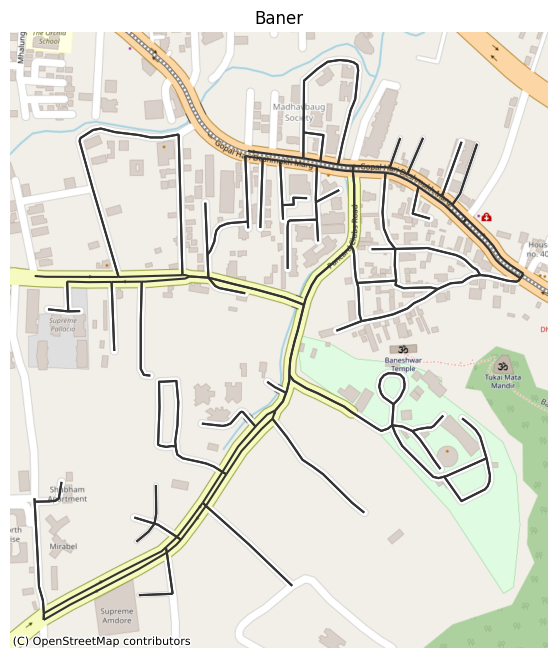

In [13]:
import contextily as ctx

ax = (bike_network.to_crs("EPSG:3857")
         .plot(figsize=(10, 8), legend=True,
               edgecolor="0.2", markersize=200, cmap="rainbow")
     )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # I'm using OSM as the source. See all provides with ctx.providers
plt.axis("off")
plt.title("Baner")

### Get the building details in your area

In [14]:
tags = {'building':True}

In [15]:
baner_buildings = ox.geometries_from_point(center_point=(18.5584546,73.7852182),dist=400,tags=tags)

In [16]:
baner_buildings = baner_buildings.assign(label='Building Footprints').reset_index()

In [17]:
(baner_buildings.head(10).T)

,0,1,2,3,4,5,6,7,8,9
element_type,node,way,way,way,way,way,way,way,way,way
osmid,1432130601,264286363,359568513,359568520,359568545,359568551,359568562,359684077,359684097,359684099
building,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
name,UBICS,Baneshwar Temple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geometry,POINT (73.7860015 18.5612441),"POLYGON ((73.7869388 18.5589314, 73.7869469 18...","POLYGON ((73.7889321 18.5605767, 73.7890453 18...","POLYGON ((73.7876847 18.56149, 73.7877554 18.5...","POLYGON ((73.78786 18.5613415, 73.7880387 18.5...","POLYGON ((73.7881551 18.559907, 73.7882733 18....","POLYGON ((73.7828324 18.5618882, 73.782974 18....","POLYGON ((73.7813494 18.5612504, 73.7814597 18...","POLYGON ((73.781994 18.5613356, 73.7821481 18....","POLYGON ((73.7814951 18.5606079, 73.7817434 18..."
nodes,NaN,"[2699768401, 2699768402, 2699768403, 269976840...","[3642483644, 3642483643, 3642483641, 364248364...","[3642483654, 3642483653, 3642483648, 364248365...","[3642483649, 3642483647, 3642483645, 364248364...","[3642483640, 3642483639, 3642483637, 364248363...","[3642483660, 3642483659, 3642483657, 364248365...","[3643589874, 3643589877, 3643589867, 364358986...","[3643589882, 3643589883, 3643589873, 364358987...","[3643589826, 3643589830, 3643589824, 364358981..."
amenity,NaN,place_of_worship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
religion,NaN,hindu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr:city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr:postcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
baner_buildings.name.fillna(value='not_known',inplace=True)

In [19]:
baner_buildings.shape

(255, 14)

### Visualize the buildings on the map

Text(0.5, 1.0, 'Baner')

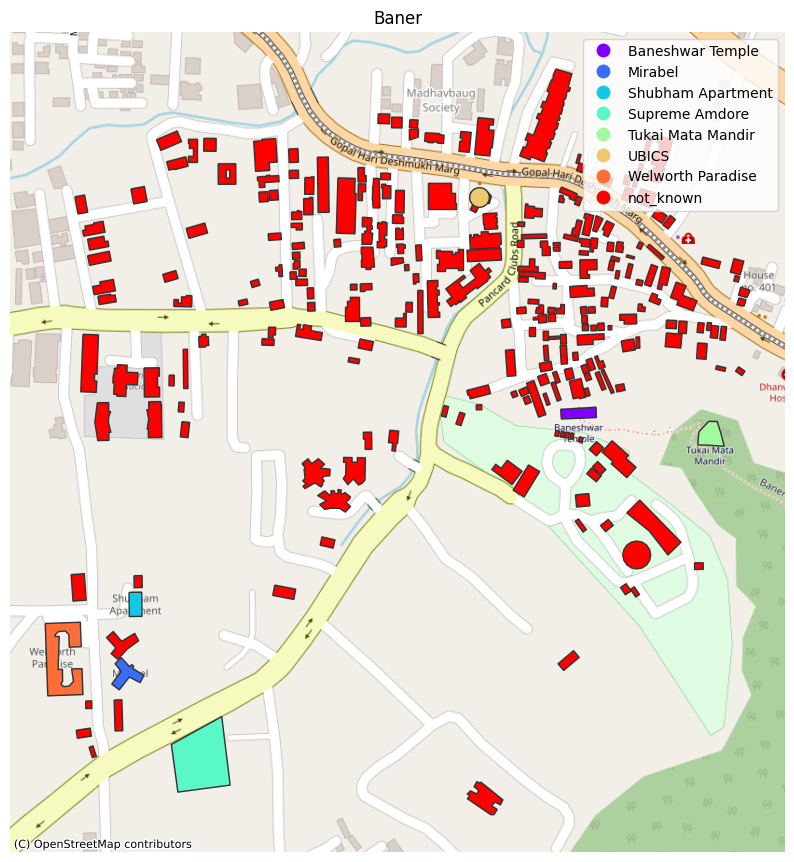

In [20]:
ax = (baner_buildings.to_crs("EPSG:3857")
         .plot(figsize=(10, 12),column="name",legend=True,
               edgecolor="0.2", markersize=200, cmap="rainbow")
     )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # I'm using OSM as the source. See all provides with ctx.providers
plt.axis("off")
plt.title("Baner")

In [21]:
baner_buildings = baner_buildings.to_crs(epsg=3347)
baner_buildings = baner_buildings.assign(area=baner_buildings.area)

In [22]:
baner_buildings= baner_buildings[['geometry','area']]

### Plot the buildings on the Map along with Area

In [36]:
baner_map = keplergl.KeplerGl(height=500)
baner_map.add_data(data=baner_buildings.copy(), name="Building area")
#baner_map.add_data(data=baner_buildings.copy(), name="height")
#baner_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [32]:
baner_map.save_to_html(file_name='first_map.html')

Map saved to first_map.html!


In [33]:
%%html
<iframe src="first_map.html" width="80%" height="500"></iframe>

In [ ]:
#from IPython.display import IFrame
#IFrame(src='first_map.html', width=700, height=600)